In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

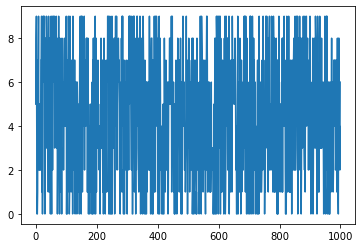

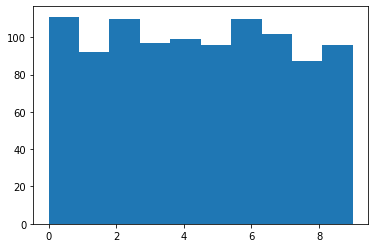

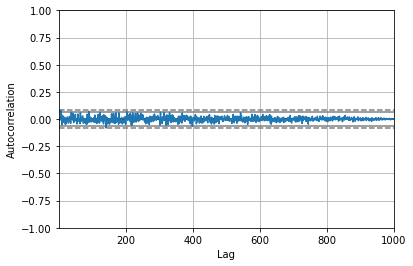

In [9]:
np.random.seed(1)
series = pd.Series(np.random.randint(0, 10, 1000))

series.plot()
plt.show()
plt.hist(series)
plt.show()
autocorrelation_plot(series)
plt.show()

# Random Walk

A simple model of a random walk is as follows:
* Start with a random number of either -1 or 1.
* Randomly select a -1 or 1 and add it to the observation from the previous time step.
* Repeat step 2 for as long as you like.

$y(t) = B_0 + B_1 \times X(t-1) + e(t)$

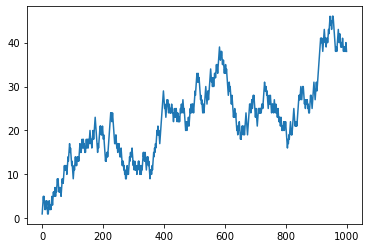

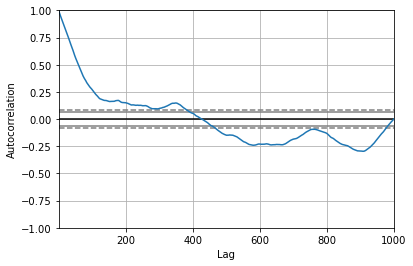

In [22]:
np.random.seed(4)

random_walk = [-1 if np.random.random() < 0.5 else 1]
for i in range(1, 1000):
    movement = -1 if np.random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

plt.plot(random_walk)
plt.show()
autocorrelation_plot(random_walk)
plt.show()

## Random Walk and Stationarity

In [27]:
from statsmodels.tsa.stattools import adfuller

np.random.seed(4)

random_walk = [-1 if np.random.random() < 0.5 else 1]
for i in range(1, 1000):
    movement = -1 if np.random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

result = adfuller(random_walk)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.015423
p-value: 0.279852
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


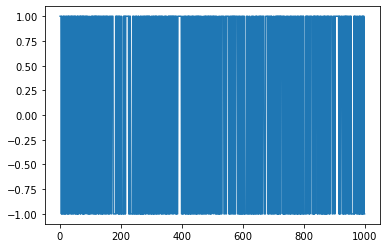

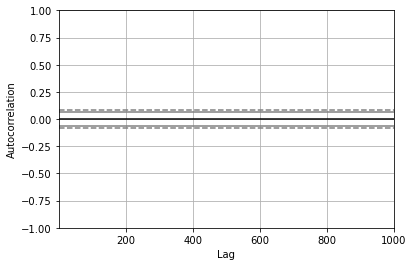

In [39]:
series = pd.Series(random_walk)
diff = series.diff()

diff.plot()
plt.show()
autocorrelation_plot(diff)
plt.show()

## Predicting a Random Walk

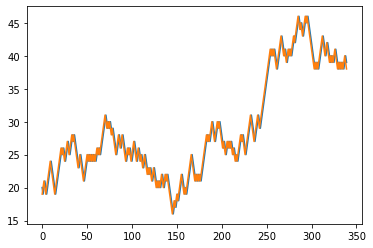

In [51]:
from sklearn.metrics import mean_squared_error

np.random.seed(4)

random_walk = [-1 if np.random.random() < 0.5 else 1]
for i in range(1, 1000):
    movement = -1 if np.random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

train_size = int(len(random_walk) * .66)
train,test = random_walk[:train_size], random_walk[train_size:]

predictions = []
history = train[-1]

for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
mse = np.sqrt(mean_squared_error(test, predictions))

plt.plot(predictions)
plt.plot(test)


1.4511658599006443


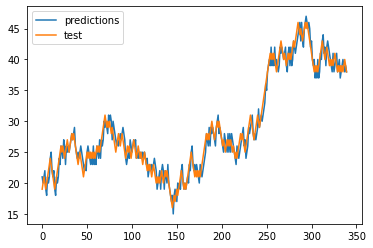

In [56]:
from sklearn.metrics import mean_squared_error

np.random.seed(4)

random_walk = [-1 if np.random.random() < 0.5 else 1]
for i in range(1, 1000):
    movement = -1 if np.random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

train_size = int(len(random_walk) * .66)
train,test = random_walk[:train_size], random_walk[train_size:]

predictions = []
history = train[-1]

for i in range(len(test)):
    yhat = history + (-1 if np.random.random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
mse = np.sqrt(mean_squared_error(test, predictions))
print(mse)

plt.plot(predictions, label='predictions')
plt.plot(test, label='test')
plt.legend()
plt.show()